# Imports 

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

## Data

In [2]:
churn = pd.read_csv('data/churn.csv')
churn.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,1,41,1,83807.86,1,0,1,112542.58,0
1,502,1,42,8,159660.80,3,1,0,113931.57,1
2,850,1,43,2,125510.82,1,1,1,79084.10,0
3,645,0,44,8,113755.78,2,1,0,149756.71,1
4,376,1,29,4,115046.74,4,1,0,119346.88,1
5,501,0,44,4,142051.07,2,0,1,74940.50,0
6,684,0,27,2,134603.88,1,1,1,71725.73,0
7,528,0,31,6,102016.72,2,0,0,80181.12,0
8,616,0,45,3,143129.41,2,0,1,64327.26,0
9,653,0,58,1,132602.88,1,1,0,5097.67,1


## Plotagem dos dados usando a biblioteca Seaborn

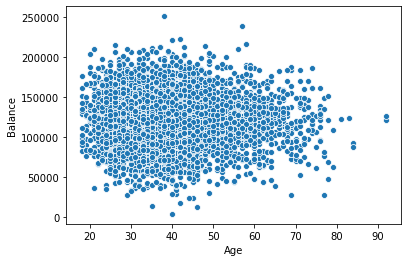

In [3]:
sns.scatterplot(data=churn, x='Age', y='Balance')

## Modelo de K-ésimo Vizinho mais Próximo
### Inicializando o modelo

In [4]:
model = KNeighborsClassifier(n_neighbors=3)

### Criando as entradas e saídas

In [5]:
x = churn.drop(['Exited'], axis = 'columns') # Removendo a coluna que será a saída
y = churn.Exited

#### Entradas

In [6]:
x.head(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,608,1,41,1,83807.86,1,0,1,112542.58
1,502,1,42,8,159660.80,3,1,0,113931.57
2,850,1,43,2,125510.82,1,1,1,79084.10
3,645,0,44,8,113755.78,2,1,0,149756.71
4,376,1,29,4,115046.74,4,1,0,119346.88


#### Saída

In [7]:
y.head(5)

0    0
1    1
2    0
3    1
4    1
Name: Exited, dtype: int64

### Treinando o modelo

In [8]:
model.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

### Score do modelo

In [9]:
model.score(x, y) # Aqui este score representa a precisão do modelo usado os dados de treino

0.8171706094313019

### Separando os dados em teste e treino

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [17]:
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [18]:
model.score(xtest, ytest) # Precisão usando dados desconhecidos do modelo

0.6992167101827677

## Fazendo a previsão utilizando o modelo

#### Cabeçalho ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [19]:
customer = [[608.0, 1.0, 31.0, 20.0, 81207.86, 2.0, 1.0, 0.0, 111142.58]]
model.predict(customer)

array([0], dtype=int64)

#### Probabilidade da previsão de ser 0 ou 1

In [20]:
model.predict_proba(customer)

array([[0.66666667, 0.33333333]])

In [21]:
customer =[[[376, 1, 29, 4, 115046.74, 4, 1, 0, 119346.88]], [[1000.0, 1.0, 26.5, 20.0, 100000.86, 5.0, 1.0, 1.0, 136142.58]], [[308.0, 0.0, 25.0, 20.0, 8007.86, 2.0, 1.0, 1.0, 21142.58]]]
for i in customer:
    print(model.predict(i))
    print(model.predict_proba(i))

[0]
[[1. 0.]]
[0]
[[0.66666667 0.33333333]]
[0]
[[1. 0.]]


### Explicação da importância de cada entrada

In [47]:
permutation_score = permutation_importance(model, xtrain, ytrain, n_repeats=10)
np.vstack((xtrain.columns, permutation_score.importances_mean)).T

array([['NumOfProducts', 0.05711727842435097],
       ['HasCrCard', 0.0024171888988361754],
       ['IsActiveMember', 0.018487018800358135],
       ['Gender', 0.01307072515666966]], dtype=object)

# Usando o modelo somente em colunas categorizadas

In [27]:
x = churn[['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender']]
y = churn.Exited

### Separando em teste e treino

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

### Inicializando o modelo

In [34]:
model = KNeighborsClassifier(n_neighbors=3)

### Treino e teste do modelo

In [35]:
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [36]:
model.score(xtest, ytest)

0.768668407310705

### Previsão usando o modelo

#### Cabeçalho [['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender']]

In [43]:
customer =[ [[1, 1, 1, 1]], [[0, 1, 0, 1]], [[0, 1, 1, 1]], [[0, 0, 0, 0]], [[1, 0, 0, 1]] ]
for i in customer:
    print(model.predict(i))
    print(model.predict_proba(i))

[0]
[[0.66666667 0.33333333]]
[1]
[[0.33333333 0.66666667]]
[0]
[[0.66666667 0.33333333]]
[0]
[[1. 0.]]
[0]
[[0.66666667 0.33333333]]


### Explicação da importância de cada entrada

In [45]:
permutation_score = permutation_importance(model, xtrain, ytrain, n_repeats=10)
np.vstack((xtrain.columns, permutation_score.importances_mean)).T

array([['NumOfProducts', 0.05675917636526413],
       ['HasCrCard', 0.0016786034019695805],
       ['IsActiveMember', 0.01779319606087737],
       ['Gender', 0.012041181736795015]], dtype=object)

### Visualização da explicação

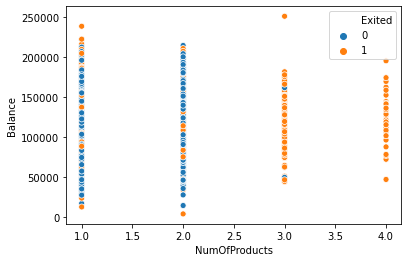

In [46]:
sns.scatterplot(data=churn, x='NumOfProducts', y='Balance', hue='Exited')